In [5]:
import numpy as np
print(np.__version__)

import torch 
import pandas as pd

BASE_PATH = './Data/'

1.25.1


In [4]:
path = "./Data/multigraphs/heteroData_gene_cell_All_cgp_cnv_META.pt"

new_data = torch.load(path)
print(new_data)

HeteroData(
  metapath_dict={
    (gene, metapath_0, gene)=[2],
    (cell, metapath_1, cell)=[2],
  },
  gene={
    node_id=[13398],
    names=[13398],
    x=[13398, 3438],
  },
  cell={
    node_id=[1150],
    names=[1150],
    x=[1150, 1218],
  },
  (gene, interacts_with, gene)={ edge_index=[2, 263122] },
  (gene, dependency_of, cell)={ edge_index=[2, 434098] },
  (gene, rev_interacts_with, gene)={ edge_index=[2, 263122] },
  (cell, rev_dependency_of, gene)={ edge_index=[2, 434098] },
  (gene, metapath_0, gene)={
    edge_index=[2, 2035911],
    edge_weight=[2035911],
  },
  (cell, metapath_1, cell)={
    edge_index=[2, 1322500],
    edge_weight=[1322500],
  }
)


In [10]:
#load cell line metadata

path = "./Data/Depmap/Model.csv"
cellines = pd.read_csv(path, header=0, index_col=0)

In [19]:
dis_groups = cellines.groupby("OncotreePrimaryDisease").apply(lambda df: list(df.index)).to_frame(name="cells")
dis_groups["length"] = dis_groups["cells"].apply(len)

# Sort by the length column in descending order
dis_groups = dis_groups.sort_values(by="length", ascending=False)

print(dis_groups)


                                                                                  cells  \
OncotreePrimaryDisease                                                                    
Non-Small Cell Lung Cancer            [ACH-000012, ACH-000015, ACH-000021, ACH-00002...   
Non-Cancerous                         [ACH-000043, ACH-000049, ACH-000063, ACH-00006...   
Mature B-Cell Neoplasms               [ACH-000024, ACH-000050, ACH-000056, ACH-00005...   
Melanoma                              [ACH-000008, ACH-000014, ACH-000219, ACH-00027...   
Diffuse Glioma                        [ACH-000027, ACH-000036, ACH-000040, ACH-00006...   
...                                                                                 ...   
Giant Cell Tumor of Bone                                                   [ACH-003191]   
Glassy Cell Carcinoma of the Cervix                                        [ACH-002019]   
Head and Neck Carcinoma, Other                                             [ACH-002234]   

/var/folders/ds/76n_grr91zn97zn1yl541y5c0000gn/T/ipykernel_68045/3312424889.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dis_groups = cellines.groupby("OncotreePrimaryDisease").apply(lambda df: list(df.index)).to_frame(name="cells")


In [20]:
print(dis_groups)


                                                                                  cells  \
OncotreePrimaryDisease                                                                    
Non-Small Cell Lung Cancer            [ACH-000012, ACH-000015, ACH-000021, ACH-00002...   
Non-Cancerous                         [ACH-000043, ACH-000049, ACH-000063, ACH-00006...   
Mature B-Cell Neoplasms               [ACH-000024, ACH-000050, ACH-000056, ACH-00005...   
Melanoma                              [ACH-000008, ACH-000014, ACH-000219, ACH-00027...   
Diffuse Glioma                        [ACH-000027, ACH-000036, ACH-000040, ACH-00006...   
...                                                                                 ...   
Giant Cell Tumor of Bone                                                   [ACH-003191]   
Glassy Cell Carcinoma of the Cervix                                        [ACH-002019]   
Head and Neck Carcinoma, Other                                             [ACH-002234]   

In [21]:
#load CRSIPR data

crispr_effect = pd.read_csv(BASE_PATH + 'Depmap/CRISPRGeneEffect.csv', header=0, index_col=0)
crispr_effect.columns = [i.split(' ')[0] for i in crispr_effect.columns]  # Extract gene names

crispr_effect.shape
         

(1150, 18443)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO  # Add this import


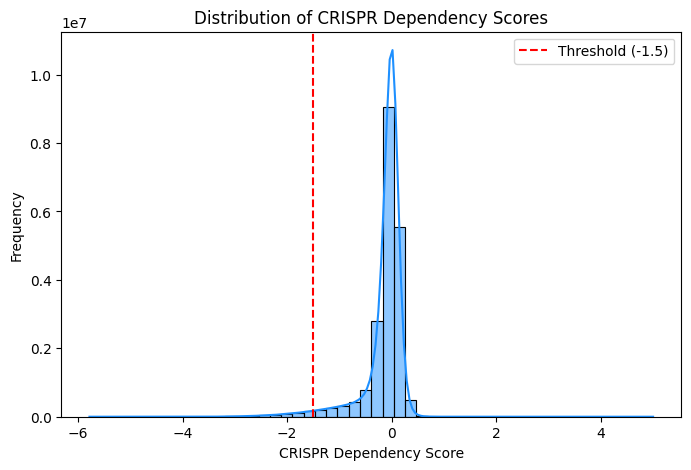

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframe (assuming it is already in memory as 'df')
# Rows = Cell lines, Columns = Genes, Values = CRISPR dependency scores

# Flatten the dataframe to get all dependency scores in a single array
scores = crispr_effect.values.flatten()

# Remove NaN values (if any)
scores = scores[~pd.isna(scores)]

# Plot a histogram
plt.figure(figsize=(8, 5))
sns.histplot(scores, bins=50, kde=True, color='dodgerblue')
plt.xlabel("CRISPR Dependency Score")
plt.ylabel("Frequency")
plt.title("Distribution of CRISPR Dependency Scores")
plt.axvline(x=-1.5, color='red', linestyle='dashed', label="Threshold (-1.5)")
plt.legend()
plt.show()


In [20]:
crispr_effect = pd.read_csv(BASE_PATH + 'Depmap/CRISPRGeneDependency.csv', header=0, index_col=0)
crispr_effect.columns = [i.split(' ')[0] for i in crispr_effect.columns]  # Extract gene names

crispr_effect.shape

(1178, 17916)

/var/folders/ds/76n_grr91zn97zn1yl541y5c0000gn/T/ipykernel_74936/2798696268.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


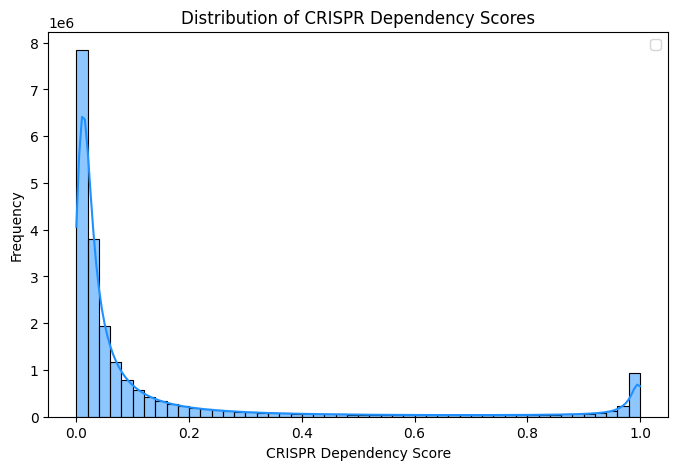

In [18]:
# Flatten the dataframe to get all dependency scores in a single array
scores = crispr_effect.values.flatten()

# Remove NaN values (if any)
scores = scores[~pd.isna(scores)]

# Plot a histogram
plt.figure(figsize=(8, 5))
sns.histplot(scores, bins=50, kde=True, color='dodgerblue')
plt.xlabel("CRISPR Dependency Score")
plt.ylabel("Frequency")
plt.title("Distribution of CRISPR Dependency Scores")
#plt.axvline(x=-1.5, color='red', linestyle='dashed', label="Threshold (-1.5)")
plt.legend()
plt.show()